# Task 1: XOR

In [1]:
# Import modules
from __future__ import print_function
import tensorflow as tf
import numpy as np
from numpy.random import shuffle
import time
import matplotlib.pyplot as plt

# Plot configurations
% matplotlib inline

# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
% load_ext autoreload
% autoreload 2

## Task 1, Part 1: Backpropagation through time (BPTT)

**Question:** Consider a simple RNN network shown in the following figure, where __ _wi, wh, b, a, c_ __ are the scalar parameters of the network. The loss function is the **mean squared error (MSE)**. Given input (x0, x1) = (1, 0), ground truth (g1, g2) = (1, 1), h0 = 0, (wi, wh, b, a, c) = (1, 1, 1, 1, 1), compute __ _(dwi, dwh, db, da, dc)_ __, which are the gradients of loss with repect to 5 parameters __ _(wi, wh, b, a, c)_ __.

![bptt](./img/bptt.png)


![bptt](./img/image0052.jpg)


![bptt](./img/image0053.jpg)


![bptt](./img/image0054.jpg)


![bptt](./img/image0058.jpg)


![bptt](./img/image0059.jpg)


![bptt](./img/image0060.jpg)


![bptt](./img/image0061.jpg)

## Use tensorflow modules to create XOR network

In this part, you need to build and train an XOR network that can learn the XOR function. It is a very simple implementation of RNN and will give you an idea how RNN is built and how to train it.

### XOR network

XOR network can learn the XOR $\oplus$ function

As shown in the figure below, and for instance, if input $(x0, x1, x2)$=(1,0,0), then output $(y1, y2, y3)$=(1,1,1). That is, $y_n = x_0\oplus x_1 \oplus ... \oplus x_{n-1}$

![xor_net](./img/xor.png)

### Create data set
This function provides you the way to generate the data which is required for the training process. You should utilize it when building your training function for the LSTM. Please read the source code for more information.

In [2]:
from ecbm4040.xor.utils import create_dataset

### Build a network using a Tensorlow LSTMCell
This section shows an example how to build a RNN network using an LSTM cell. LSTM cell is an inbuilt class in tensorflow which implements the real behavior of the LSTM neuron. 

Reference: [TensorFlow LSTM cell](https://www.tensorflow.org/api_docs/python/tf/contrib/rnn/LSTMCell)

In [3]:
from tensorflow.contrib.rnn import LSTMCell

tf.reset_default_graph()

# Input shape: (num_samples, seq_length, input_dimension)
# Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1. 
input_data = tf.placeholder(tf.float32,shape=[None,None,1])
output_data = tf.placeholder(tf.int64,shape=[None,None])

# define LSTM cell
lstm_units = 64
cell = LSTMCell(lstm_units,num_proj=2,state_is_tuple=True)

# create LSTM network: you can also choose other modules provided by tensorflow, like static_rnn etc.
out,_ = tf.nn.dynamic_rnn(cell,input_data,dtype=tf.float32)
pred = tf.argmax(out,axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))
initializer = tf.global_variables_initializer()
# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

# accuracy
correct_num = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct_num,tf.float32))

### Training 

1. Build your training funciton for RNN; 
2. Plot the cost during the traning

In [4]:
# YOUR TRAINING AND PLOTTING CODE HERE
seq = 8
num = 80000
x_train, y_train = create_dataset(num, seq)
loss_list = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for e in range(500):        
        sess.run(optimizer, feed_dict={input_data: x_train, output_data: y_train})
        cost = sess.run(loss, feed_dict={input_data: x_train, output_data: y_train})
        loss_list.append(cost)
        #val_acc = sess.run(accuracy, feed_dict={input_data: x_train, output_data: y_train})
        print('epoch {}: cost = {}'.format(e+1, cost))


epoch 1: cost = 0.6960839033126831
epoch 2: cost = 0.6956195831298828
epoch 3: cost = 0.6952208280563354
epoch 4: cost = 0.6948840618133545
epoch 5: cost = 0.6946050524711609
epoch 6: cost = 0.6943771243095398
epoch 7: cost = 0.6941933035850525
epoch 8: cost = 0.6940454840660095
epoch 9: cost = 0.693925142288208
epoch 10: cost = 0.6938229203224182
epoch 11: cost = 0.6937311887741089
epoch 12: cost = 0.6936435699462891
epoch 13: cost = 0.6935551166534424
epoch 14: cost = 0.6934642195701599
epoch 15: cost = 0.6933677792549133
epoch 16: cost = 0.6932669281959534
epoch 17: cost = 0.6931611895561218
epoch 18: cost = 0.6930511593818665
epoch 19: cost = 0.6929384469985962
epoch 20: cost = 0.6928231716156006
epoch 21: cost = 0.6927064061164856
epoch 22: cost = 0.6925895810127258
epoch 23: cost = 0.6924721598625183
epoch 24: cost = 0.6923556923866272
epoch 25: cost = 0.6922407150268555
epoch 26: cost = 0.6921266317367554
epoch 27: cost = 0.6920140981674194
epoch 28: cost = 0.6919040083885193
ep

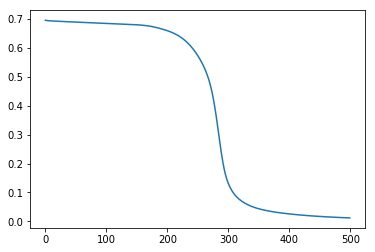

In [5]:
plt.plot(loss_list)
plt.show()

## Task 1, Part 3 :  Build your own LSTMCell
In this part, you need to build your own LSTM cell to achieve the LSTM functionality. 

1. Write the training function for your RNN;
2. Plot the cost during training.

In [17]:
from ecbm4040.xor.rnn import MyLSTMCell

# recreate xor netowrk with your own LSTM cell
tf.reset_default_graph()

#Input shape: (num_samples,seq_length,input_dimension)
#Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1. 
input_data = tf.placeholder(tf.float32,shape=[None,None,1])
output_data = tf.placeholder(tf.int64,shape=[None,None])

# recreate xor netowrk with your own LSTM cell
lstm_units = 64
cell = MyLSTMCell(lstm_units,num_proj=2)

# create LSTM network: you can also choose other modules provided by tensorflow, like static_rnn etc.
out,_ = tf.nn.dynamic_rnn(cell,input_data,dtype=tf.float32)
pred = tf.argmax(out,axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))
# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
# accuracy
correct = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

### Training

In [18]:
# YOUR TRAINING AND PLOTTING CODE HERE
seq = 8
num = 80000
x_train, y_train = create_dataset(num, seq)
loss_list = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for e in range(500):        
        sess.run(optimizer, feed_dict={input_data: x_train, output_data: y_train})
        cost = sess.run(loss, feed_dict={input_data: x_train, output_data: y_train})
        loss_list.append(cost)
        #val_acc = sess.run(accuracy, feed_dict={input_data: x_train, output_data: y_train})
        print('epoch {}: cost = {}'.format(e+1, cost))

epoch 1: cost = 0.6921519041061401
epoch 2: cost = 0.6919685006141663
epoch 3: cost = 0.6918026208877563
epoch 4: cost = 0.6916438341140747
epoch 5: cost = 0.6914879679679871
epoch 6: cost = 0.6913352012634277
epoch 7: cost = 0.691185474395752
epoch 8: cost = 0.6910379528999329
epoch 9: cost = 0.6908932328224182
epoch 10: cost = 0.690750777721405
epoch 11: cost = 0.690611720085144
epoch 12: cost = 0.6904748678207397
epoch 13: cost = 0.690340518951416
epoch 14: cost = 0.6902092695236206
epoch 15: cost = 0.6900805830955505
epoch 16: cost = 0.6899550557136536
epoch 17: cost = 0.6898319125175476
epoch 18: cost = 0.6897116303443909
epoch 19: cost = 0.6895936727523804
epoch 20: cost = 0.6894776821136475
epoch 21: cost = 0.6893646121025085
epoch 22: cost = 0.6892526149749756
epoch 23: cost = 0.6891432404518127
epoch 24: cost = 0.6890349388122559
epoch 25: cost = 0.6889283657073975
epoch 26: cost = 0.6888233423233032
epoch 27: cost = 0.688719630241394
epoch 28: cost = 0.6886171698570251
epoch 

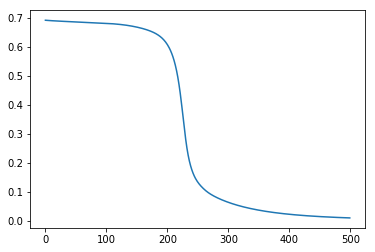

In [19]:
plt.plot(loss_list)
plt.show()